In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 최소 제곱법

In [6]:
def least_squares(x):
    return 1/2 * x ** 2

In [7]:
xx = np.linspace(-5, 5, 100)
y = least_squares(xx)

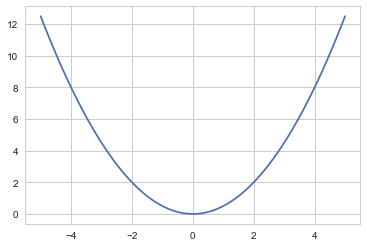

In [8]:
plt.plot(xx, y)

y가 최소가 되는 f(x)의 x,즉 theta를 찾는 방법

In [9]:
def f(x, theta):
    b = theta[0]
    w = theta[1]
    return b + w*x

In [10]:
def e(y, yhat):
    return 1/2 * np.sum(np.square(y - yhat))

In [26]:
x = np.array([58, 70, 81, 84])
y = np.array([374, 385, 375, 401])

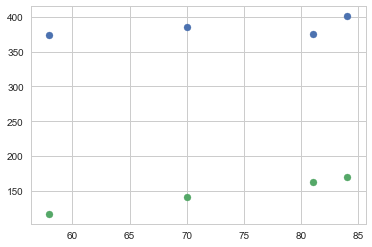

In [12]:
plt.scatter(x, y)
yhat = f(x, [1, 2])
plt.scatter(x, yhat)

In [13]:
scores = []

for i in np.linspace(-50, 50, 500):
    for j in np.linspace(-50, 50, 500):
        yhat = f(x, [i, j])
        score = e(y, yhat)
        scores.append([score, i, j]) 

In [14]:
resdf = pd.DataFrame(scores)
resdf = resdf.sort_values(0, ascending=True).reset_index(drop=True)

In [15]:
resdf.round(2)

,0,1,2
0,3333.74,50.00,4.51
1,3336.60,49.80,4.51
2,3339.62,49.60,4.51
3,3342.80,49.40,4.51
4,3346.14,49.20,4.51
5,3349.64,49.00,4.51
6,3353.30,48.80,4.51
7,3357.12,48.60,4.51
8,3361.10,48.40,4.51
9,3365.24,48.20,4.51


50.0 4.509018036072149
45.59118236472946 4.30861723446894


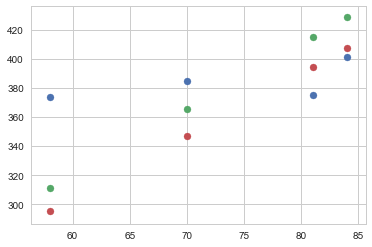

In [16]:
plt.scatter(x, y)

for i in np.arange(0, 500, 250):
    b = resdf.iloc[i][1]
    w = resdf.iloc[i][2]
    yhat = f(x, [b, w])
    print(b, w)
    plt.scatter(x, yhat)

### 최급하강법

In [17]:
def f(x):
    return (x - 1)**2
def f_(x):
    return 2*(x-1)

In [18]:
def sgd_f(x, u=0.4):
    return x - (u * f_(x))

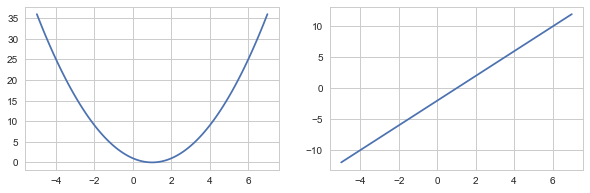

In [19]:
xx = np.linspace(-5, 7, 100)
y = f(xx)

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(xx, y)

y = f_(xx)
plt.subplot(122)
plt.plot(xx, y)


In [20]:
x1 = sgd_f(3)
print(x1)
for _ in range(30):
    x1 = sgd_f(x1) # 다음 좌표 
    print(x1)
    
## 점점 최저점으로 다가간다 (0으로 다가감))

1.4
1.08
1.016
1.0032
1.00064
1.000128
1.0000256
1.00000512
1.000001024
1.0000002048
1.00000004096
1.000000008192
1.0000000016384
1.00000000032768
1.000000000065536
1.0000000000131073
1.0000000000026215
1.0000000000005242
1.0000000000001048
1.0000000000000209
1.0000000000000042
1.0000000000000009
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [23]:
x

array([58, 70, 81, 84])

In [27]:
y

array([374, 385, 375, 401])

In [29]:
def f(x):
    return 

def sgd_f0(yh, y, u=0.4):
    return t0 - u * np.sum(yh - y) 

def sgd_f1(yh, y, u=0.4):
    return t0 - u * np.sum(yh - y) * x 

In [28]:
x1 = sgd_f0(58, 374, 1, 2)
print(x1)

103.80000000000001


In [ ]:
x1 = sgd_f0(3)
print(x1)
for _ in range(30):
    x1 = sgd_f(x1) # 다음 좌표 
    print(x1)

In [1]:

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]